In [11]:
import re
import matplotlib.pyplot as plt

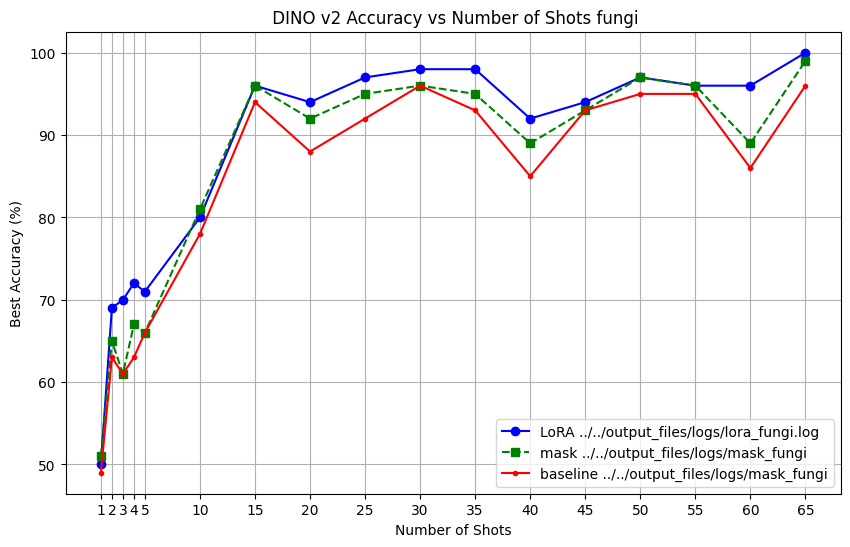

In [20]:
# Initialize lists to store the number of shots and the corresponding accuracies
dataset = 'fungi'
num_shots = []
accuracies = []
filename = f'../../output_files/logs/lora_{dataset}.log'
filename2 = f'../../output_files/logs/mask_{dataset}'
filename3 = f'../../output_files/logs/baseline_{dataset}.log'


# Function to extract number of shots and accuracy from a log file
def parse_log_file(log_file, pattern):
    num_shots = []
    accuracies = []
    
    with open(log_file, 'r') as file:
        for line in file:
            match = re.search(pattern, line)
            if match:
                num_shot = int(match.group(1))
                accuracy = float(match.group(2))
                num_shots.append(num_shot)
                accuracies.append(accuracy)
                
        # Zip num_shots and accuracies together, sort by num_shots, and unzip
    sorted_data = sorted(zip(num_shots, accuracies), key=lambda x: x[0])
    num_shots, accuracies = zip(*sorted_data)
    
    return list(num_shots), list(accuracies)

def plot():

    # Define the regex patterns for each log file
    pattern1 = r'Best trial for (\d+) shots: Value: ([\d.]+)'
    pattern2 = r'Best trial: \{\'num_shots\': (\d+), \'best_accuracy\': ([\d.]+)'
    pattern3 = r'Number of shots: (\d+), Best accuracy: ([\d.]+)'


    # Parse the two log files
    num_shots1, accuracies1 = parse_log_file(filename, pattern1)
    num_shots2, accuracies2 = parse_log_file(filename2, pattern2)
    num_shots3, accuracies3 = parse_log_file(filename3,pattern3)

    # Plot the results from both log files
    plt.figure(figsize=(10, 6))

    # Plot for logfile.log (LoRA)
    plt.plot(num_shots1, accuracies1, marker='o', linestyle='-', color='b', label=f'LoRA {filename}')

    # Plot for logfile2.log (Mask)
    plt.plot(num_shots2, accuracies2, marker='s', linestyle='--', color='g', label=f'mask {filename2}')
    plt.plot(num_shots3, accuracies3, marker='.', linestyle='-', color='r', label=f'baseline {filename2}')

    # Add title and labels
    plt.title(f' DINO v2 Accuracy vs Number of Shots {dataset}')
    plt.xlabel('Number of Shots')
    plt.ylabel('Best Accuracy (%)')
    plt.grid(True)

    # Add legend to differentiate the two datasets
    plt.legend()

    # Show the x-axis with the exact number of shots
    plt.xticks(sorted(set(num_shots1 + num_shots2)))

    # Display the plot
    plt.show()

plot()


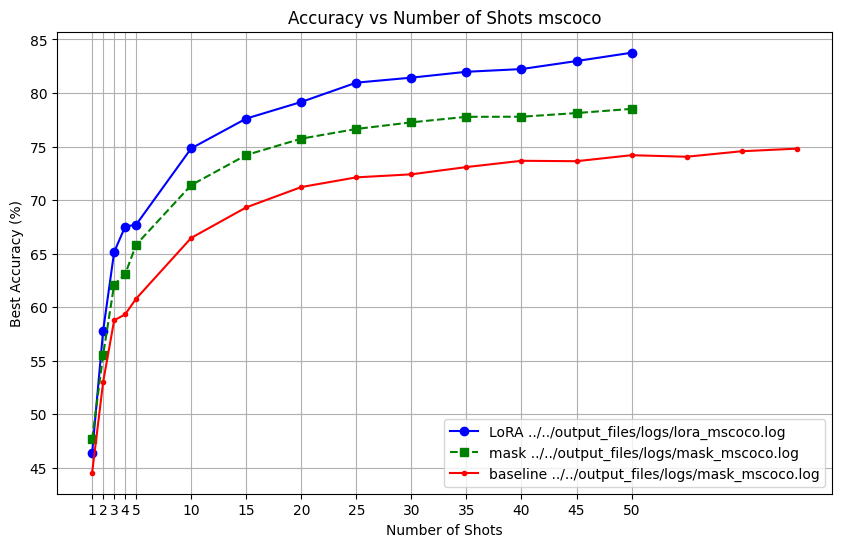

In [13]:
# Initialize lists to store the number of shots and the corresponding accuracies
dataset = 'mscoco'
num_shots = []
accuracies = []
filename = f'../../output_files/logs/lora_{dataset}.log'
filename2 = f'../../output_files/logs/mask_{dataset}.log'
filename3 = f'../../output_files/logs/baseline_{dataset}.log'
plot()

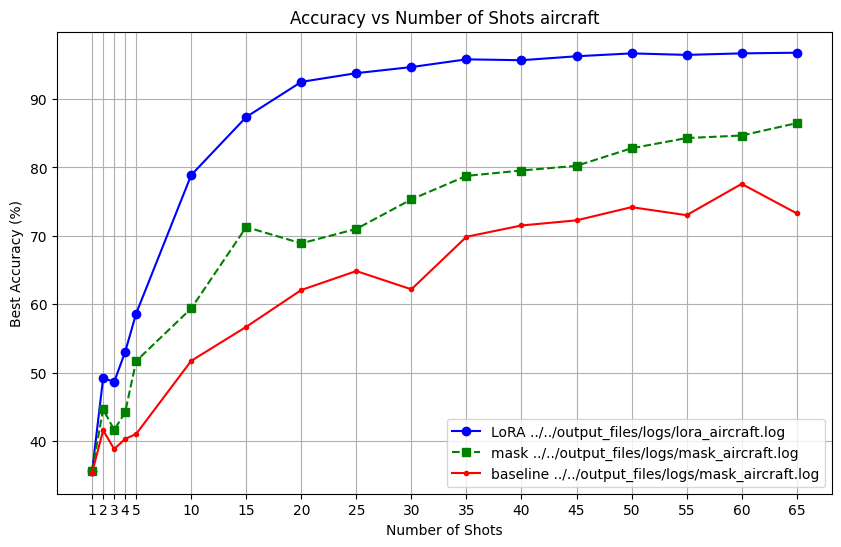

In [14]:
# Initialize lists to store the number of shots and the corresponding accuracies
dataset = 'aircraft'
num_shots = []
accuracies = []
filename = f'../../output_files/logs/lora_{dataset}.log'
filename2 = f'../../output_files/logs/mask_{dataset}.log'
filename3 = f'../../output_files/logs/baseline_{dataset}.log'
plot()

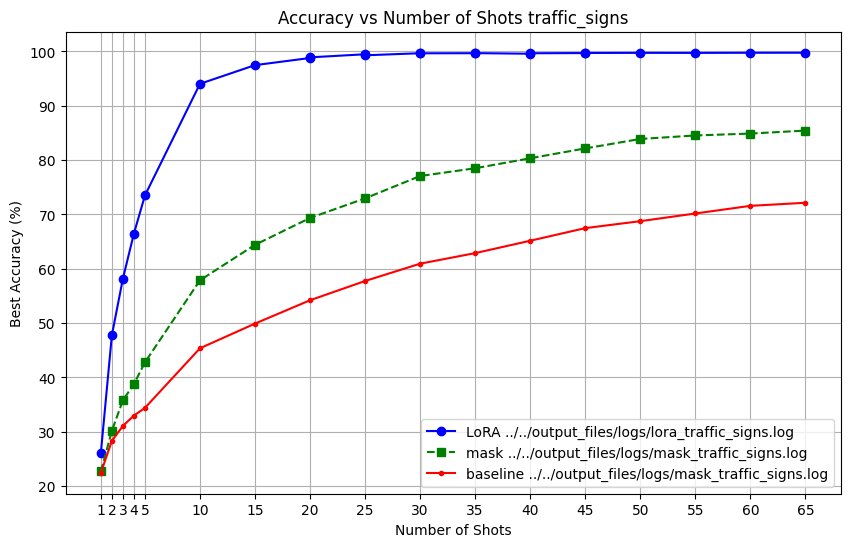

In [15]:
# Initialize lists to store the number of shots and the corresponding accuracies
dataset = 'traffic_signs'
num_shots = []
accuracies = []
filename = f'../../output_files/logs/lora_{dataset}.log'
filename2 = f'../../output_files/logs/mask_{dataset}.log'
filename3 = f'../../output_files/logs/baseline_{dataset}.log'
plot()

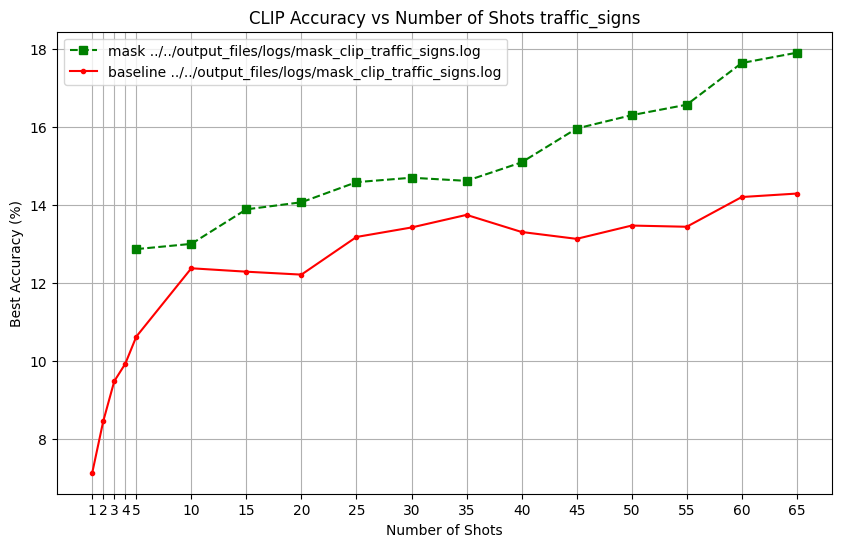

In [16]:
# Initialize lists to store the number of shots and the corresponding accuracies
dataset = 'traffic_signs'
num_shots = []
accuracies = []
filename2 = f'../../output_files/logs/mask_clip_{dataset}.log'
filename = f'../../output_files/logs/baseline_clip_{dataset}.log'
def plot():

    # Define the regex patterns for each log file
    #pattern1 = r'Best trial for (\d+) shots: Value: ([\d.]+)'
    pattern2 = r'Best trial: \{\'num_shots\': (\d+), \'best_accuracy\': ([\d.]+)'
    pattern1 = r'Number of shots: (\d+), Best accuracy: ([\d.]+)'


    # Parse the two log files
    num_shots1, accuracies1 = parse_log_file(filename, pattern1)
    num_shots2, accuracies2 = parse_log_file(filename2, pattern2)
    #num_shots3, accuracies3 = parse_log_file(filename3,pattern3)

    # Plot the results from both log files
    plt.figure(figsize=(10, 6))

    # Plot for logfile.log (LoRA)
    #plt.plot(num_shots1, accuracies1, marker='o', linestyle='-', color='b', label=f'LoRA {filename}')

    # Plot for logfile2.log (Mask)
    plt.plot(num_shots2, accuracies2, marker='s', linestyle='--', color='g', label=f'mask {filename2}')
    plt.plot(num_shots1, accuracies1, marker='.', linestyle='-', color='r', label=f'baseline {filename2}')

    # Add title and labels
    plt.title(f'CLIP Accuracy vs Number of Shots {dataset}')
    plt.xlabel('Number of Shots')
    plt.ylabel('Best Accuracy (%)')
    plt.grid(True)

    # Add legend to differentiate the two datasets
    plt.legend()

    # Show the x-axis with the exact number of shots
    plt.xticks(sorted(set(num_shots1 + num_shots2)))

    # Display the plot
    plt.show()

plot()


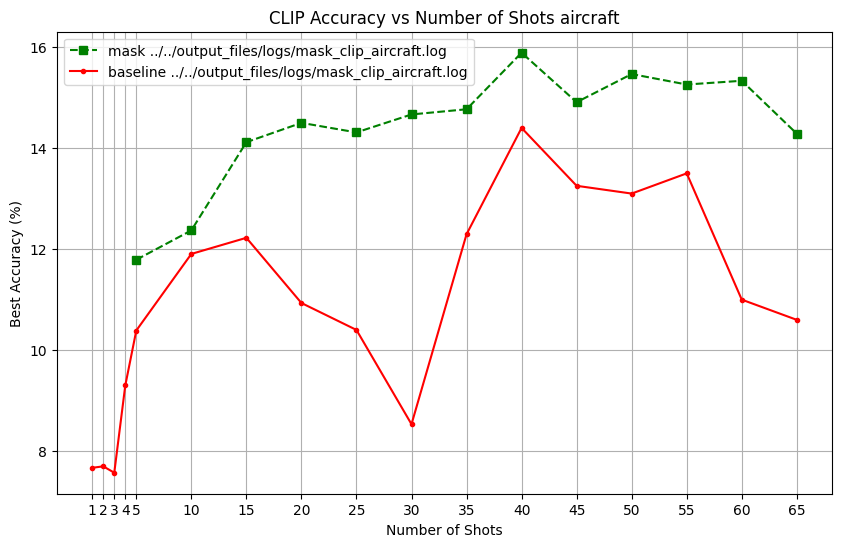

In [17]:
# Initialize lists to store the number of shots and the corresponding accuracies
dataset = 'aircraft'
num_shots = []
accuracies = []
filename2 = f'../../output_files/logs/mask_clip_{dataset}.log'
filename = f'../../output_files/logs/baseline_clip_{dataset}.log'
plot()

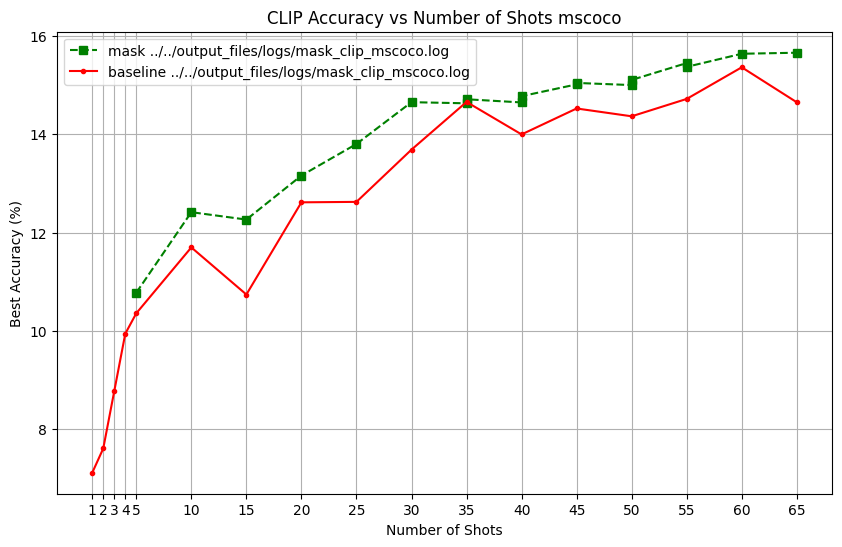

In [18]:
# Initialize lists to store the number of shots and the corresponding accuracies
dataset = 'mscoco'
num_shots = []
accuracies = []
filename2 = f'../../output_files/logs/mask_clip_{dataset}.log'
filename = f'../../output_files/logs/baseline_clip_{dataset}.log'
plot()

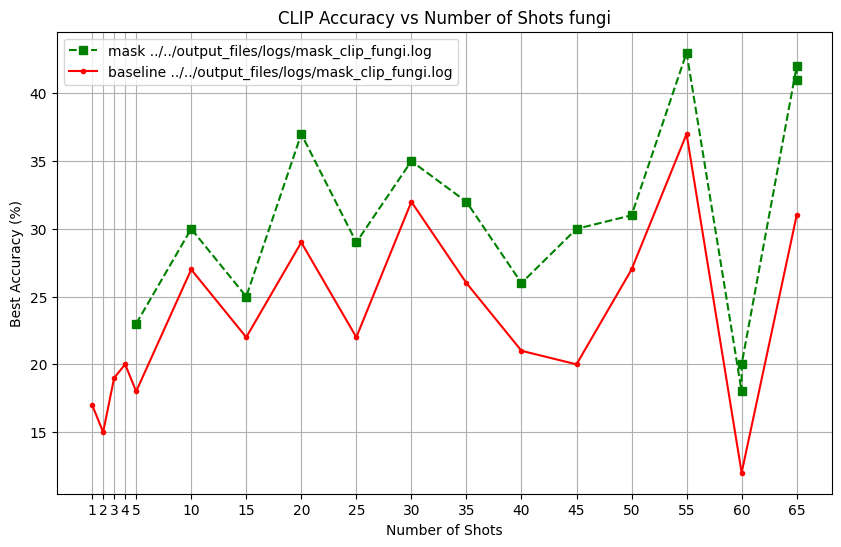

In [19]:
# Initialize lists to store the number of shots and the corresponding accuracies
dataset = 'fungi'
num_shots = []
accuracies = []
filename2 = f'../../output_files/logs/mask_clip_{dataset}.log'
filename = f'../../output_files/logs/baseline_clip_{dataset}.log'
plot()